# Desafio 1

Para esse desafio, vamos trabalhar com o data set [Black Friday](https://www.kaggle.com/mehdidag/black-friday), que reúne dados sobre transações de compras em uma loja de varejo.

Vamos utilizá-lo para praticar a exploração de data sets utilizando pandas. Você pode fazer toda análise neste mesmo notebook, mas as resposta devem estar nos locais indicados.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Set up_ da análise

In [1]:
import pandas as pd
import numpy as np

In [2]:
black_friday = pd.read_csv("black_friday.csv")

## Inicie sua análise a partir daqui

In [3]:
type(black_friday.index)

pandas.core.indexes.range.RangeIndex

In [4]:
#Q1: Número de linhas no dataset:

a1 = (black_friday.shape[0], black_friday.shape[1])
a1

(537577, 12)

In [5]:
black_friday.sample(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
254092,1003242,P00231742,M,51-55,13,C,4+,1,6,NaN,NaN,20470
379730,1004407,P00216442,M,18-25,4,A,1,0,5,NaN,NaN,5336
165484,1001579,P00242742,M,26-35,0,A,0,0,1,2.0,9.0,11583
368373,1002769,P00165642,M,26-35,7,C,0,0,1,8.0,16.0,15712
12097,1001822,P00215442,F,26-35,0,C,1,1,15,16.0,NaN,20947
534015,1004224,P00288042,F,46-50,1,C,1,1,8,NaN,NaN,6082
119556,1000453,P00183342,M,18-25,4,B,1,0,5,15.0,18.0,6913
400835,1001675,P00280542,F,26-35,6,B,1,1,11,NaN,NaN,4674
133527,1002592,P00325542,M,51-55,7,B,1,1,18,NaN,NaN,3071
132504,1002383,P00070342,F,26-35,14,B,3,0,1,2.0,14.0,4474


In [6]:
#Q2
list(black_friday)

['User_ID',
 'Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

In [7]:
mulheres = black_friday[black_friday['Gender'] == 'F'].shape[0]
homens = black_friday[black_friday['Gender'] == 'M'].shape[0]
print('Número de mulheres é de ', str(mulheres), 'e de homens de :', str(homens), '\n', 
     'Este total é de', str(mulheres + homens), 'E o total de linhas no dataframe é de:', str(black_friday.shape[0]))

Número de mulheres é de  132197 e de homens de : 405380 
 Este total é de 537577 E o total de linhas no dataframe é de: 537577


In [8]:
#O negócio já tava em bin e eu aqui me matando parar criar condições baseadas em ints
# f_f = black_friday['Gender'] == 'F'
# f_f_26_35 = black_friday['Age'] == '26-35'
# all_filters = f_f & f_f_26_35
# a2 = black_friday[all_filters]
a2 = black_friday[(black_friday['Gender'] == 'F') & (black_friday['Age'] == '26-35')].shape[0]

In [42]:
#Q3
a3 = black_friday['User_ID'].nunique()
a3

5891

In [10]:
#Q4
a4 = black_friday.dtypes.unique().shape[0]
a4

3

In [11]:
#Q5
black_friday.isnull().sum(axis = 0)

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [12]:
    black_friday.isnull().any(axis = 1).sum()

373299

In [13]:
linhas_vazias = black_friday.isnull().any(axis = 1).sum()
a5 = linhas_vazias/black_friday.shape[0]
a5

0.6944102891306734

In [14]:
print("Há um total de ",linhas_vazias, "registros com pelo menos uma coluna vazia, de um total de ", black_friday.shape[0], "registros")

Há um total de  373299 registros com pelo menos uma coluna vazia, de um total de  537577 registros


In [15]:
#Q6
#Já sei qual é a coluna que contém a maior quantidade de null, então:
a6 = black_friday['Product_Category_3'].isnull().sum()
a6

373299

In [49]:
#Q7
#Valor mais frequente em uma série de dados é claro que é a moda
a7 = black_friday['Product_Category_3'].mode()[0]
a7

16.0

In [17]:
#Q8
from sklearn import preprocessing
import numpy as np

In [18]:
X = black_friday['Purchase'].values
X

array([ 8370, 15200,  1422, ...,  8043,  7172,  6875], dtype=int64)

In [19]:
X.shape

(537577,)

In [20]:
min_max_value = preprocessing.MinMaxScaler()
X = black_friday['Purchase'].values.astype(float)

In [21]:
X = np.reshape(X, (-1,1))
X

array([[ 8370.],
       [15200.],
       [ 1422.],
       ...,
       [ 8043.],
       [ 7172.],
       [ 6875.]])

In [22]:
purchase_norm = min_max_value.fit_transform(X)

In [23]:
black_friday['Purchase'].mean()

9333.859852635065

In [24]:
a8 = np.mean(purchase_norm)

In [25]:
print("A média antes da normalização era de ", black_friday['Purchase'].mean(), 
      "e agora a média após a normalização é de", np.mean(purchase_norm))

A média antes da normalização era de  9333.859852635065 e agora a média após a normalização é de 0.3847939036269795


(array([ 32175.,  57237., 130109., 104444.,  79179.,  24980.,  63928.,
         13437.,  29772.,   2316.]),
 array([-1.83674517, -1.35941298, -0.88208079, -0.4047486 ,  0.07258359,
         0.54991578,  1.02724798,  1.50458017,  1.98191236,  2.45924455,
         2.93657674]),
 <a list of 10 Patch objects>)

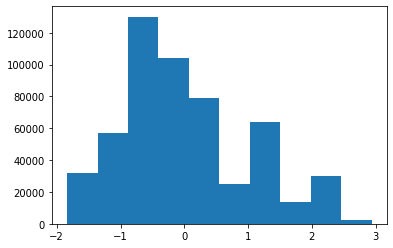

In [26]:
#Q8
scaler = preprocessing.StandardScaler()
standard_purchase = scaler.fit_transform(X)
import matplotlib.pyplot as plt
plt.hist(standard_purchase)

In [27]:
print("Após a normalização, a média do valor de compra passou a ser de ", np.mean(standard_purchase), 
      "E o desvio padrão de", np.std(standard_purchase))

Após a normalização, a média do valor de compra passou a ser de  -1.6188801655557636e-16 E o desvio padrão de 1.0


In [28]:
df_purchase_stand = pd.DataFrame(standard_purchase)

In [29]:
df_purchase_stand.columns = ['Valores']
df_purchase_stand

,Valores
0,-0.193507
1,1.177699
2,-1.588402
3,-1.661681
4,-0.274012
...,...
537572,0.467804
537573,1.979945
537574,-0.259156
537575,-0.434020


In [30]:
a9 = df_purchase_stand[(df_purchase_stand['Valores'] > -1) & (df_purchase_stand['Valores']< 1)].shape[0]
a9

348631

In [31]:
#Q10


In [32]:
a10 = True

In [35]:
a10

True

In [50]:
lista = [a1,a2,a3,a4,a5,a6,a7,a8,a9,a10]

In [51]:
lista

[(537577, 12),
 49348,
 5891,
 3,
 0.6944102891306734,
 373299,
 16.0,
 0.3847939036269795,
 348631,
 True]

## Questão 1

Quantas observações e quantas colunas há no dataset? Responda no formato de uma tuple `(n_observacoes, n_colunas)`.

In [126]:
def q1():
    return a1
    # Retorne aqui o resultado da questão 1.
    pass

## Questão 2

Há quantas mulheres com idade entre 26 e 35 anos no dataset? Responda como um único escalar.

In [127]:
def q2():
    a2
    return a2# Retorne aqui o resultado da questão 2.
    pass

## Questão 3

Quantos usuários únicos há no dataset? Responda como um único escalar.

In [128]:
def q3():
    a3
    return a3# Retorne aqui o resultado da questão 3.
    pass

## Questão 4

Quantos tipos de dados diferentes existem no dataset? Responda como um único escalar.

In [129]:
def q4():
    a4
    return a4# Retorne aqui o resultado da questão 4.
    pass

## Questão 5

Qual porcentagem dos registros possui ao menos um valor null (`None`, `ǸaN` etc)? Responda como um único escalar entre 0 e 1.

In [130]:
def q5():
    a5
    return a5
    # Retorne aqui o resultado da questão 5.
    pass

## Questão 6

Quantos valores null existem na variável (coluna) com o maior número de null? Responda como um único escalar.

In [131]:
def q6():
    a6
    return a6
    # Retorne aqui o resultado da questão 6.
    pass

## Questão 7

Qual o valor mais frequente (sem contar nulls) em `Product_Category_3`? Responda como um único escalar.

In [132]:
def q7():
    a7
    return a7
    # Retorne aqui o resultado da questão 7.
    pass

## Questão 8

Qual a nova média da variável (coluna) `Purchase` após sua normalização? Responda como um único escalar.

In [133]:
def q8(): 
    a8
    return a8
    # Retorne aqui o resultado da questão 8.
    pass

## Questão 9

Quantas ocorrências entre -1 e 1 inclusive existem da variáel `Purchase` após sua padronização? Responda como um único escalar.

In [134]:
def q9():
    a9
    return a9# Retorne aqui o resultado da questão 9.
    pass

## Questão 10

Podemos afirmar que se uma observação é null em `Product_Category_2` ela também o é em `Product_Category_3`? Responda com um bool (`True`, `False`).

In [135]:
def q10():
    a10
    return a10
    # Retorne aqui o resultado da questão 10.
    pass